In [2]:
%matplotlib notebook

# Dependencies
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from itertools import cycle, islice
import shutil
pd.options.mode.chained_assignment = None  # default='warn'


## Demographic Data Merge by Jane
* #### Merging all demographic output cvs data
* #### Select only high level result

In [3]:
# Set directory file paths
demo_path = os.path.join(".", "Output/Demographic/Charleen")
country_pop_path = os.path.join(".", "Output/Demographic", "country_pop_2010-17.csv")
state_pop_path = os.path.join(".", "Output/Demographic", "state_pop_2010-17.csv")
state_co_path = os.path.join(".", "Output/Business", "state_co_ttl_2012-16.csv")
# state_crime_path = os.path.join(".", "Output/Crime", "CrimeDataFinal.csv")
all_demo_path = os.path.join(".", "Output/Demographic", "state_demo_2017.csv")
error_path = os.path.join(".", "Output", "data_analysis_error.txt")

# print(f'{country_pop_path}, {state_pop_path}')

In [4]:
# Read population data and select only 2017
state_pop_data = pd.read_csv(state_pop_path, index_col=0)
all_data_df = state_pop_data[["State", "2017", "2016", "2015"]].rename(columns={"2017": "Pop_2017", "2016": "Pop_2016", "2015": "Pop_2015"})
all_data_df.count()


State       51
Pop_2017    51
Pop_2016    51
Pop_2015    51
dtype: int64

In [5]:
# Read company data and select only 2016 (most recent)
state_co_data = pd.read_csv(state_co_path, index_col=0)
state_co_df = state_co_data[["State", "2016_#Companies"]].rename(columns={"2016_#Companies": "Co_2016"})
# Merge data by state
all_data_df = pd.merge(all_data_df, state_co_df, how='inner', on='State')
all_data_df.count()

State       51
Pop_2017    51
Pop_2016    51
Pop_2015    51
Co_2016     51
dtype: int64

In [6]:
# Read all files from directory - Output/Demographic folder
xList = [x for x in os.listdir(demo_path)]

# Open text file in APPEND mode (a, r - read, w -write)
with open(error_path, "a") as xfile:
    
    # Loop thru the file list and write info to opened text file if criteria are met
    for x in xList:                
        # If error, record exception
        try:
            # Split the extension from the path and normalise it to lowercase.
            ext = os.path.splitext(x)[-1].lower()
            excel = os.path.splitext(x)[0].lower()

            # If it's csv file, read to dataframe and merge as it loop
            if ext == ".csv": 
                demo_data = pd.read_csv(f'{demo_path}/{x}', index_col=0)
                # -------------------------------------------------------------------------------------------
                # Merge data by state
                all_data_df = pd.merge(all_data_df, demo_data, how='inner', on='State')

        except Exception as e:
            # Write error to text file if occurs
            xfile.write(f'****************************************************************************\n')
            xfile.write(f'### {x} ###\n')  # Write file name to text file            
            xfile.write("Exception occurred: {}".format(e) + "\n")  # Write error to text file

# Display merged result
all_data_df.count()

State                     51
Pop_2017                  51
Pop_2016                  51
Pop_2015                  51
Co_2016                   51
Edu_25+yrs_ttl13          51
25+yrs_<high_school_13    51
25+yrs_high_school_13     51
25+yrs_college_13         51
25+yrs_>B.S._13           51
Edu_25+yrs_ttl14          51
25+yrs_<high_school_14    51
25+yrs_high_school_14     51
25+yrs_college_14         51
25+yrs_>B.S._14           51
Edu_25+yrs_ttl15          51
25+yrs_<high_school_15    51
25+yrs_high_school_15     51
25+yrs_college_15         51
25+yrs_>B.S._15           51
Edu_25+yrs_ttl16          51
25+yrs_<high_school_16    51
25+yrs_high_school_16     51
25+yrs_college_16         51
25+yrs_>B.S._16           51
Edu_25+yrs_ttl17          51
25+yrs_<high_school_17    51
25+yrs_high_school_17     51
25+yrs_college_17         51
25+yrs_>B.S._17           51
                          ..
Black_14                  51
Native_14                 51
Asian_14                  51
Hawaiian_Other

In [7]:
# Read crime data and select only 2015 (most recent)
# state_crime_data = pd.read_csv(state_crime_path, index_col=0).reset_index()
# state_crime_data["State"] = state_crime_data.State.str.capitalize()
# state_crime_df = state_crime_data[["State", "Crime 2015"]].rename(columns={"Crime 2015": "Crime_2015"}).astype(str)
# state_crime_df.count()

In [8]:
# # Merge data by state
# all_data_df = pd.merge(all_data_df, state_crime_df, how="left", on='State')
# all_data_df.count()

In [9]:
# If exist, open output file & print result if error occurs
if os.path.exists(error_path):
    print(open(error_path).read())

In [10]:
# # If exist, delete error file
# if os.path.exists(error_path):
#     os.remove(error_path)

In [11]:
# Rename columns
all_df = all_data_df.reindex(columns=["State", "Pop_2017", "%_M_17", "%_F_17", "Ttl_Households_17", "Households_Earnings%_17", "Mean_Earnings$_17", "Edu_25+yrs_ttl17", "25+yrs_<high_school_17", "25+yrs_high_school_17", "25+yrs_college_17", "25+yrs_>B.S._17", "All_Races_17", "White_17", "Black_17", "Native_17", "Asian_17", "Hawaiian_Other_17", "Other_17", "Mixed_Race_17", "Pop_2016", "Co_2016", "Pop_2015"])
all_df["Pop_2017"] = all_df["Pop_2017"].str.replace(",", "").astype(int)
all_df.head()

,State,Pop_2017,%_M_17,%_F_17,Ttl_Households_17,Households_Earnings%_17,Mean_Earnings$_17,Edu_25+yrs_ttl17,25+yrs_<high_school_17,25+yrs_high_school_17,...,White_17,Black_17,Native_17,Asian_17,Hawaiian_Other_17,Other_17,Mixed_Race_17,Pop_2016,Co_2016,Pop_2015
0,Alabama,4874747,48.5,51.5,1856695,72.4,67093,3276637,14.7,30.9,...,68.4,26.5,0.5,1.3,0.0,1.4,1.8,"4,860,545",73976,"4,850,858"
1,Alaska,739795,52.3,47.7,252536,86.0,90061,475442,7.6,27.6,...,65.3,3.2,14.2,6.2,1.2,1.4,8.5,"741,522",17059,"737,979"
2,Arizona,7016270,49.7,50.3,2482311,74.7,74501,4516175,13.5,24.2,...,77.5,4.3,4.4,3.1,0.2,7.0,3.5,"6,908,642",106963,"6,802,262"
3,Arkansas,3004279,49.1,50.9,1147291,73.1,63854,1985770,14.4,34.3,...,77.3,15.4,0.7,1.4,0.2,2.5,2.4,"2,988,231",50511,"2,975,626"
4,California,39536653,49.7,50.3,12888128,80.6,96538,25950818,17.5,20.6,...,60.6,5.8,0.7,14.1,0.4,13.7,4.7,"39,296,476",751982,"39,032,444"


In [12]:
# Get % of educated people
# Select certain columns, format data, and save to csv
all_df["Edu%_25+yrs_ttl17"] = [round(((row["Edu_25+yrs_ttl17"]/row["Pop_2017"]) * 100),1) for i, row in all_df.iterrows()]
Demo_df = all_df[["State", "Pop_2017", "%_M_17", "%_F_17", "White_17", "Black_17", "Native_17", "Asian_17", 
                  "Hawaiian_Other_17", "Other_17", "Mixed_Race_17", "Ttl_Households_17", 
                  "Households_Earnings%_17", "Mean_Earnings$_17", "Edu%_25+yrs_ttl17"]]
namesList = ["Population", "Male (%)", "Female (%)", "White (%)", "Black (%)", "Native Indian (%)", 
             "Asian (%)", "Hawaiian / Pacific Islander (%)", "Others (%)", "Mixed Race (%)", "Total Households", 
             "Households w/Earnings (%)", "Average Earnings ($)", "25+ yrs w/Education (%)"]
Demo_df.columns = Demo_df.columns[:1].tolist() + namesList

Demo_df["Average Earnings ($)"] = Demo_df["Average Earnings ($)"].map('{:,.2f}'.format)
Demo_df["Population"] = Demo_df["Population"].map('{:,.2f}'.format)
Demo_df["Total Households"] = Demo_df["Total Households"].map('{:,.2f}'.format)
# Save cleaned data to csv & display
# All demo 
Demo_df.to_csv(all_demo_path)
Demo_df.head()

,State,Population,Male (%),Female (%),White (%),Black (%),Native Indian (%),Asian (%),Hawaiian / Pacific Islander (%),Others (%),Mixed Race (%),Total Households,Households w/Earnings (%),Average Earnings ($),25+ yrs w/Education (%)
0,Alabama,"4,874,747.00",48.5,51.5,68.4,26.5,0.5,1.3,0.0,1.4,1.8,"1,856,695.00",72.4,"67,093.00",67.2
1,Alaska,"739,795.00",52.3,47.7,65.3,3.2,14.2,6.2,1.2,1.4,8.5,"252,536.00",86.0,"90,061.00",64.3
2,Arizona,"7,016,270.00",49.7,50.3,77.5,4.3,4.4,3.1,0.2,7.0,3.5,"2,482,311.00",74.7,"74,501.00",64.4
3,Arkansas,"3,004,279.00",49.1,50.9,77.3,15.4,0.7,1.4,0.2,2.5,2.4,"1,147,291.00",73.1,"63,854.00",66.1
4,California,"39,536,653.00",49.7,50.3,60.6,5.8,0.7,14.1,0.4,13.7,4.7,"12,888,128.00",80.6,"96,538.00",65.6


### Top 5 States with Highest Mean Earnings


In [13]:
Wealthy_data = all_df[["State", "Pop_2017", "Ttl_Households_17", "Households_Earnings%_17", "Mean_Earnings$_17"]]

Wealthy_data["Household_Earning"] = [round((row["Households_Earnings%_17"]/100) * row["Ttl_Households_17"]) for i, row in Wealthy_data.iterrows()]
Wealthy_data = Wealthy_data.rename(columns={"Pop_2017": "Population", "Ttl_Households_17": "Households", "Household_Earning": "Household w/Earnings", "Mean_Earnings$_17": "Mean Earning ($)"})
Wealthy_rt = Wealthy_data.sort_values(by='Mean Earning ($)', ascending=False)
Wealthy_rt.drop(Wealthy_rt.columns[[3,4]],inplace=True, axis=1)
# Wealthy_df = pd.DataFrame(Wealthy_rt.iloc[0:5,:])
Wealthy_rt.head()


,State,Population,Households,Household w/Earnings
8,District of Columbia,693972,277985,222944
30,New Jersey,9005644,3199111,2549691
6,Connecticut,3588184,1361755,1074425
21,Massachusetts,6859819,2585715,2040129
20,Maryland,6052177,2181093,1781953


In [14]:
Wealthy_rt["Population"] = [(row["Population"]/100000) for i, row in Wealthy_rt.iterrows()]
Wealthy_rt["Households"] = [(row["Households"]/100000) for i, row in Wealthy_rt.iterrows()]
Wealthy_rt["Household w/Earnings"] = [(row["Household w/Earnings"]/100000) for i, row in Wealthy_rt.iterrows()]
Wealthy_rt

,State,Population,Households,Household w/Earnings
8,District of Columbia,6.93972,2.77985,2.22944
30,New Jersey,90.05644,31.99111,25.49691
6,Connecticut,35.88184,13.61755,10.74425
21,Massachusetts,68.59819,25.85715,20.40129
20,Maryland,60.52177,21.81093,17.81953
32,New York,198.49399,73.02710,56.52298
4,California,395.36653,128.88128,103.87831
46,Virginia,84.70020,31.05636,24.93826
29,New Hampshire,13.42795,5.26710,4.23475
11,Hawaii,14.27538,4.55502,3.67135


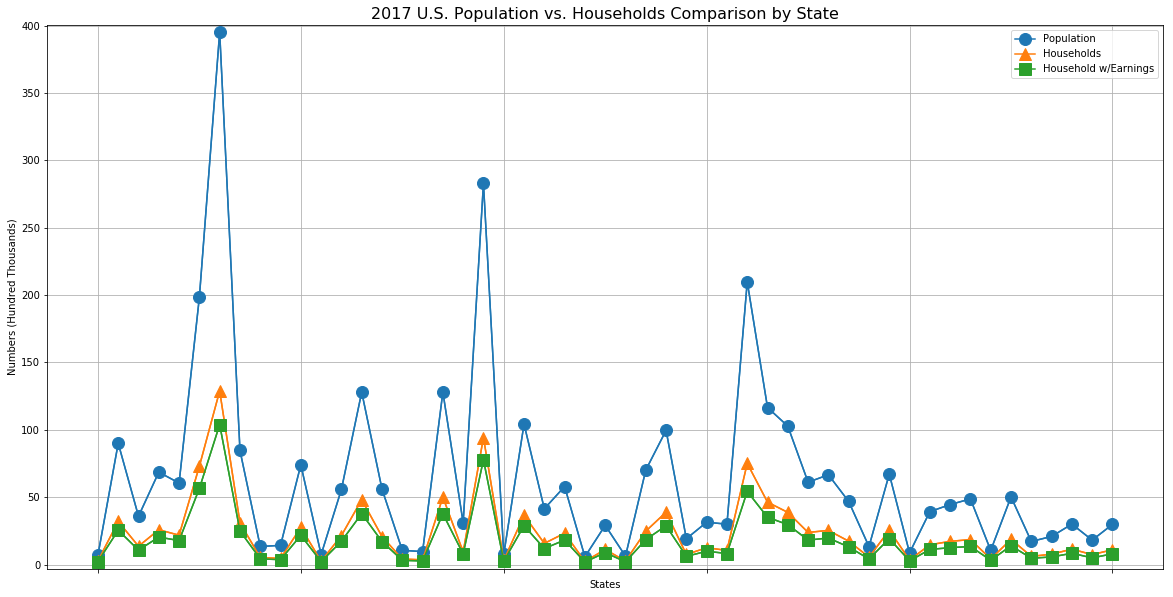

<Figure size 432x288 with 0 Axes>

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate the Plot (with Error Bars)
Wealthy_rt.set_index("State", inplace=True)
my_dot = ['o-', '^-', 's-']
# Plot error bars
ax = Wealthy_rt.plot(figsize=(20,10), legend=False)
# Reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
# Plot the markers
Wealthy_rt.plot(figsize=(20,10), style=my_dot, markersize=12, ax=ax)

plt.grid()
plt.title("2017 U.S. Population vs. Households Comparison by State", fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.xlabel("States")
plt.ylabel("Numbers (Hundred Thousands)")
plt.ylim(min(Wealthy_rt["Household w/Earnings"]) - 5, max(Wealthy_rt["Population"]) + 5)

# Print our chart to the screen
plt.show()

# Save the plot and display it
plt.savefig("Images/PopvsHousehold_2017.png")
plt.show()

In [16]:
# import matplotlib.cm as cm
# import matplotlib.pyplot as plt
# from itertools import cycle, islice

# # % of population with educated people by state plot
# Wealthy_rt = Wealthy_df.set_index("State")
# x_axis = np.arange(len(Wealthy_rt))
# y_axis = Wealthy_rt["Average Earnings ($)"]/1000

# x_ticks = Wealthy_rt.index
# plt.figure(figsize=(8, 6))
# plt.xticks(x_axis, x_ticks, rotation=90)
# plt.grid()
# # x_axis.color_cycle
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k', 'm']), None, len(Wealthy_rt)))

# plt.xlim(min(x_axis) -1, max(x_axis) + 1)
# plt.ylim(min(y_axis) -5, max(y_axis) + 1)

# plt.title("2017 Top 5 States with Highest Mean Earning", fontdict={'fontsize': 14, 'fontweight': 'bold'})
# plt.xlabel("States")
# plt.ylabel("$ (Thouseand)")

# plt.bar(x_axis, y_axis, color=my_colors, alpha=0.5, align="center")
# plt.tight_layout()

# plt.savefig("Images/Top%_Wealthy_State.png")
# plt.show()

## Top 5 States w/ most educated people 2017 by Jane
* #### Filter to get top 5 states and only selected columns
* #### Map the bar plot

In [24]:
# Top 5 States with the most educated people
Demo_Edu_df = Demo_df.sort_values(by='State', ascending=False)
Demo_Edu_df["Population"] = Demo_Edu_df.Population.str.replace(",","")
# Convert population to integer
Demo_Edu_df.Population = pd.to_numeric(Demo_Edu_df.Population, errors='coerce').fillna(0).astype(np.int64)
total_pop = Demo_Edu_df["Population"].sum()
# Demo_Edu_df["25+yrs_w/Edu"] = [(round((row["25+ yrs w/Education (%)"]/100) * row["Population"])/total_pop) for i, row in Demo_Edu_df.iterrows()]
Demo_Edu_df= Demo_Edu_df.rename(columns={"25+ yrs w/Education (%)": "Pct_Edu_Pop"})
Demo_Edu_df = Demo_Edu_df.sort_values(by='Pct_Edu_Pop', ascending=False)
# Demo_Edu_df = Demo_df.sort_values(by='25+ yrs w/Education (%)', ascending=False)
Edu_df = pd.DataFrame(Demo_Edu_df.iloc[0:5,:]).reset_index(drop=True)
Edu_df.drop(Edu_df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13]],inplace=True, axis=1)

Edu_df


,State,Pct_Edu_Pop
0,Maine,71.9
1,West Virginia,71.2
2,Vermont,70.2
3,New Hampshire,70.0
4,Pennsylvania,69.4


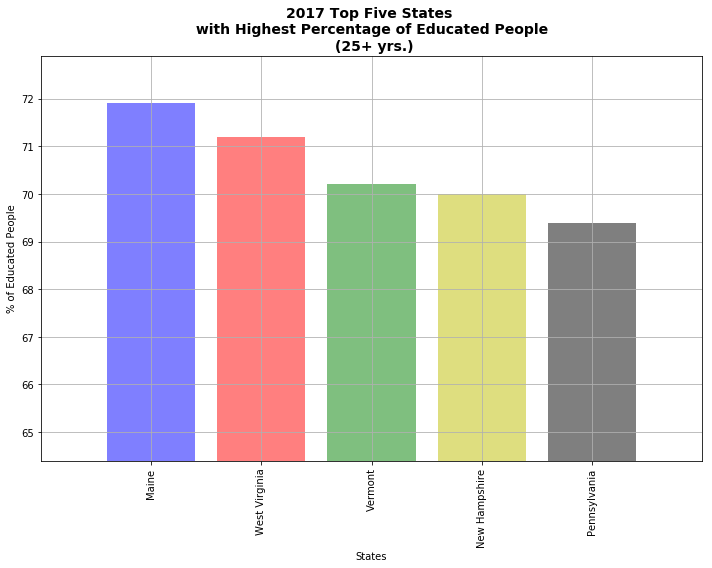

In [25]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from itertools import cycle, islice

# % of population with educated people by state plot
Edu_df = Edu_df.set_index("State")
x_axis = np.arange(len(Edu_df))
y_axis = Edu_df["Pct_Edu_Pop"]

x_ticks = Edu_df.index
plt.figure(figsize=(10, 8))
plt.xticks(x_axis, x_ticks, rotation=90)
plt.grid()
# x_axis.color_cycle
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k', 'm']), None, len(Edu_df)))

plt.xlim(min(x_axis) -1, max(x_axis) + 1)
plt.ylim(min(y_axis) -5, max(y_axis) + 1)

plt.title("2017 Top Five States \n with Highest Percentage of Educated People \n (25+ yrs.)", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("States")
plt.ylabel("% of Educated People")

plt.bar(x_axis, y_axis, color=my_colors, alpha=0.5, align="center")
plt.tight_layout()

plt.savefig("Images/Top%_Educated_State.png")
plt.show()


## Business Rate vs Population by Jane
### * Top 5 states with the highest/lowest business rate per capita (100,000)
### * Compare over 5 years period


In [34]:
# Read data & merge total population by state over 5 yrs
business_data = pd.read_csv(state_co_path, index_col=0)
total_gender_state_df = pd.read_csv("./Output/Demographic/Charleen/genderallyearsbystate.csv", index_col=0)
state_pop_df = total_gender_state_df[["State", "Total_Population 12", "Total_Population 13", "Total_Population 14", "Total_Population 15", "Total_Population 16"]]
business_df = (pd.merge(state_pop_df, business_data, how='inner', on='State'))

namesList = ["Total_Pop12", "Total_Pop13", "Total_Pop14", "Total_Pop15", "Total_Pop16", "Co_12", "Co_13", "Co_14", "Co_15", "Co_16"]
business_df.columns = business_df.columns[:1].tolist() + namesList
business_df.head()


,State,Total_Pop12,Total_Pop13,Total_Pop14,Total_Pop15,Total_Pop16,Co_12,Co_13,Co_14,Co_15,Co_16
0,Alabama,4777326,4799277,4817678,4830620,4841164,73661,73371,73154,73409,73976
1,Alaska,711139,720316,728300,733375,736855,16656,16733,16841,16952,17059
2,Arizona,6410979,6479703,6561516,6641928,6728577,101205,102313,103312,105004,106963
3,Arkansas,2916372,2933369,2947036,2958208,2968472,50412,50318,50151,50451,50511
4,California,37325068,37659181,38066920,38421464,38654206,701899,711086,724483,740303,751982


In [35]:
# Calculate total business rate per capita (100,000 population)
years = ["12", "13", "14","15","16"]

for year in years:    
    business_df["Co_Rate"+ str(year)] = [round((row["Co_"+ str(year)] / row["Total_Pop"+ str(year)]) * 100000) for i, row in business_df.iterrows()]
    business_df["Pop_Co"+ str(year)] = [round((row["Total_Pop"+ str(year)] / row["Co_"+ str(year)])) for i, row in business_df.iterrows()]

business_df.head()

,State,Total_Pop12,Total_Pop13,Total_Pop14,Total_Pop15,Total_Pop16,Co_12,Co_13,Co_14,Co_15,...,Co_Rate12,Pop_Co12,Co_Rate13,Pop_Co13,Co_Rate14,Pop_Co14,Co_Rate15,Pop_Co15,Co_Rate16,Pop_Co16
0,Alabama,4777326,4799277,4817678,4830620,4841164,73661,73371,73154,73409,...,1542,65,1529,65,1518,66,1520,66,1528,65
1,Alaska,711139,720316,728300,733375,736855,16656,16733,16841,16952,...,2342,43,2323,43,2312,43,2312,43,2315,43
2,Arizona,6410979,6479703,6561516,6641928,6728577,101205,102313,103312,105004,...,1579,63,1579,63,1575,64,1581,63,1590,63
3,Arkansas,2916372,2933369,2947036,2958208,2968472,50412,50318,50151,50451,...,1729,58,1715,58,1702,59,1705,59,1702,59
4,California,37325068,37659181,38066920,38421464,38654206,701899,711086,724483,740303,...,1881,53,1888,53,1903,53,1927,52,1945,51


In [48]:
co_df = business_df[["State", "Co_Rate12", "Co_Rate13", "Co_Rate14", "Co_Rate15", "Co_Rate16"]]

# Sort by state with the most business
co_max = co_df .sort_values(by='Co_Rate16', ascending=False)
co_max = co_max.iloc[0:5,:]
co_max

,State,Co_Rate12,Co_Rate13,Co_Rate14,Co_Rate15,Co_Rate16
26,Montana,3166,3168,3161,3176,3171
50,Wyoming,3163,3112,3103,3124,3079
45,Vermont,2912,2904,2889,2893,2898
8,District of Columbia,2827,2794,2756,2754,2746
34,North Dakota,2886,2884,2880,2823,2714


<IPython.core.display.Javascript object>


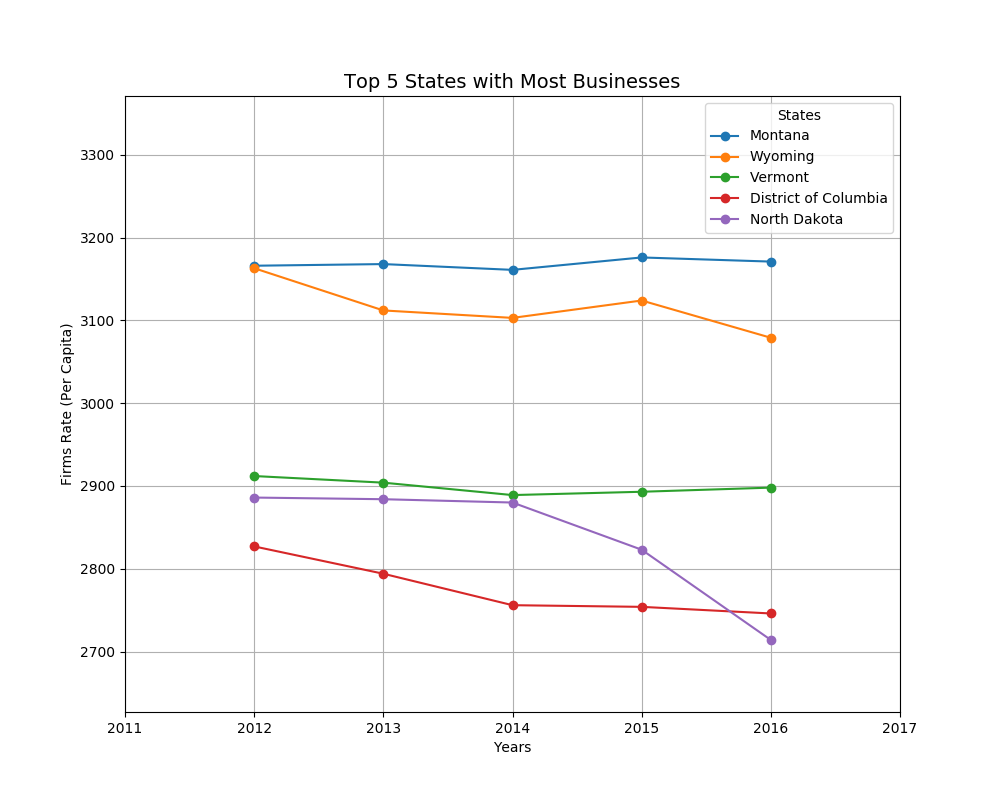

In [49]:
%matplotlib notebook
# Dependencies
import matplotlib.pyplot as plt

# Get state & map plot
state_list = co_max["State"].values.tolist()
co_max = co_max.set_index("State")
# Create a list of the years that we will use as our x axis
years = [2012,2013,2014,2015,2016]

for item in state_list:
    num_firm_yr = co_max.loc[item,["Co_Rate12","Co_Rate13", "Co_Rate14", "Co_Rate15", "Co_Rate16"]]
    plt.plot(years, num_firm_yr, marker="o", label=item)

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.grid()
plt.title("Top 5 States with Most Businesses", fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.xlabel("Years")
plt.ylabel("Firms Rate (Per Capita)")
plt.xlim(round(min(years) - 1), round(max(years) + 1))
plt.ylim(min(co_max["Co_Rate12"]) - 200, max(co_max["Co_Rate16"]) + 200)
# Create a legend
plt.legend(title="States", loc='best')
        
# Save the plot and display it
plt.savefig("Images/10States_Most_Co.png")
plt.show()


In [63]:
# Least businesses in 5 states
# Sort by state with the most business
co_min = co_df .sort_values(by='Co_Rate16', ascending=True)
co_min = co_min.iloc[0:5,:]
co_min

,State,Co_Rate12,Co_Rate13,Co_Rate14,Co_Rate15,Co_Rate16
48,West Virginia,1546,1522,1505,1487,1465
24,Mississippi,1507,1495,1490,1487,1486
42,Tennessee,1517,1504,1492,1494,1498
0,Alabama,1542,1529,1518,1520,1528
17,Kentucky,1564,1572,1570,1565,1558


<IPython.core.display.Javascript object>


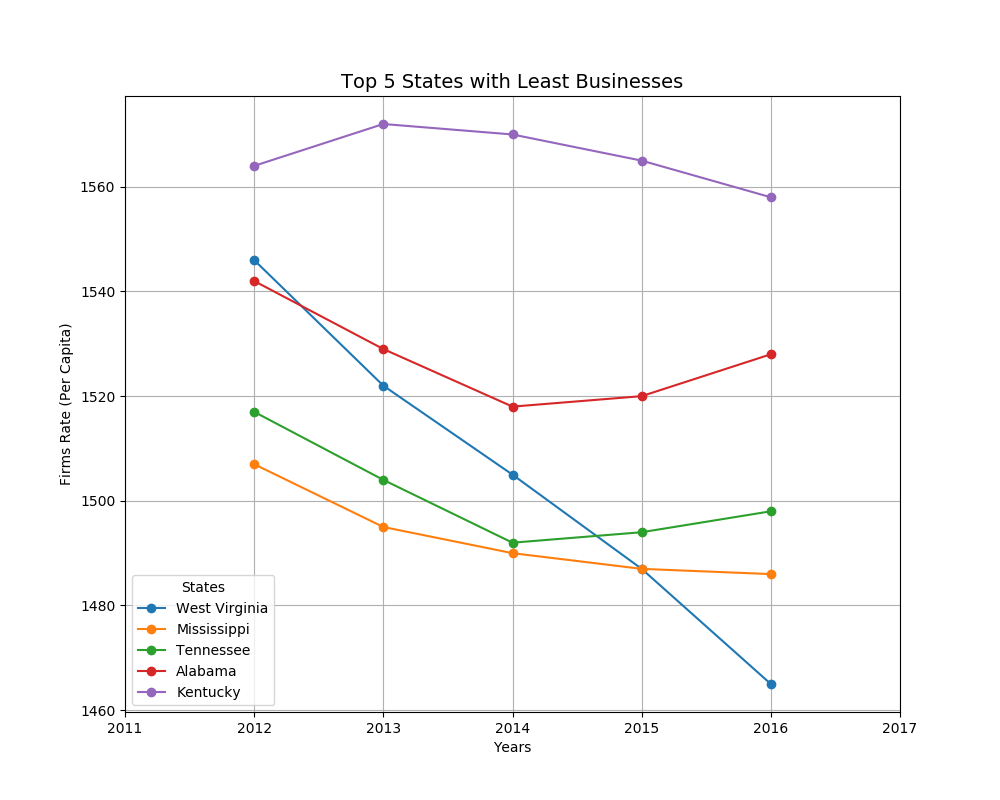

In [64]:
%matplotlib notebook
# Dependencies
import matplotlib.pyplot as plt

# Get state & map plot
state_list = co_min["State"].values.tolist()
co_min = co_min.set_index("State")
# Create a list of the years that we will use as our x axis
years = [2012,2013,2014,2015,2016]

for item in state_list:
    num_firm_yr = co_min.loc[item,["Co_Rate12","Co_Rate13", "Co_Rate14", "Co_Rate15", "Co_Rate16"]]
    plt.plot(years, num_firm_yr, marker="o", label=item)

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.grid()
plt.title("Top 5 States with Least Businesses", fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.xlabel("Years")
plt.ylabel("Firms Rate (Per Capita)")
plt.xlim(round(min(years) - 1), round(max(years) + 1))
# plt.ylim(min(co_min["Co_Rate12"]) - 50, co_min(co_max["Co_Rate16"]) + 50)
# Create a legend
plt.legend(title="States", loc='best')
        
# Save the plot and display it
plt.savefig("Images/10States_Least_Co.png")
plt.show()

## US Population Pie Chart: 2017 by Jane
* #### High-level outlook by region

In [65]:
# Read population data and select only 2017
country_pop_data = pd.read_csv(country_pop_path, index_col=0)
ttl_pop_2017 = country_pop_data.iloc[0]["2017"]   #Get total US population in 2017
country_pop_df = country_pop_data.drop(country_pop_data.index[[0]])
country_pop_df["2017"] = country_pop_df ["2017"].replace({',': ''}, regex=True).astype(int)
country_pop_df["Pop%_2017"] = (country_pop_df["2017"]/country_pop_df["2017"].sum()) * 100  
country_pop_df


,Region,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,Pop%_2017
1,Northeast,"55,317,240","55,318,350","55,388,349","55,642,659","55,860,261","56,047,732","56,203,078","56,296,628","56,359,360",56470581,17.337199
2,Midwest,"66,927,001","66,929,794","66,973,360","67,141,501","67,318,295","67,534,451","67,720,120","67,839,187","67,978,168",68179351,20.931942
3,South,"114,555,744","114,563,024","114,869,241","116,060,993","117,291,728","118,422,269","119,699,966","121,081,238","122,423,457",123658624,37.964797
4,West,"71,945,553","71,946,937","72,107,471","72,799,127","73,522,988","74,230,053","74,999,361","75,822,786","76,644,950",77410622,23.766062


<IPython.core.display.Javascript object>


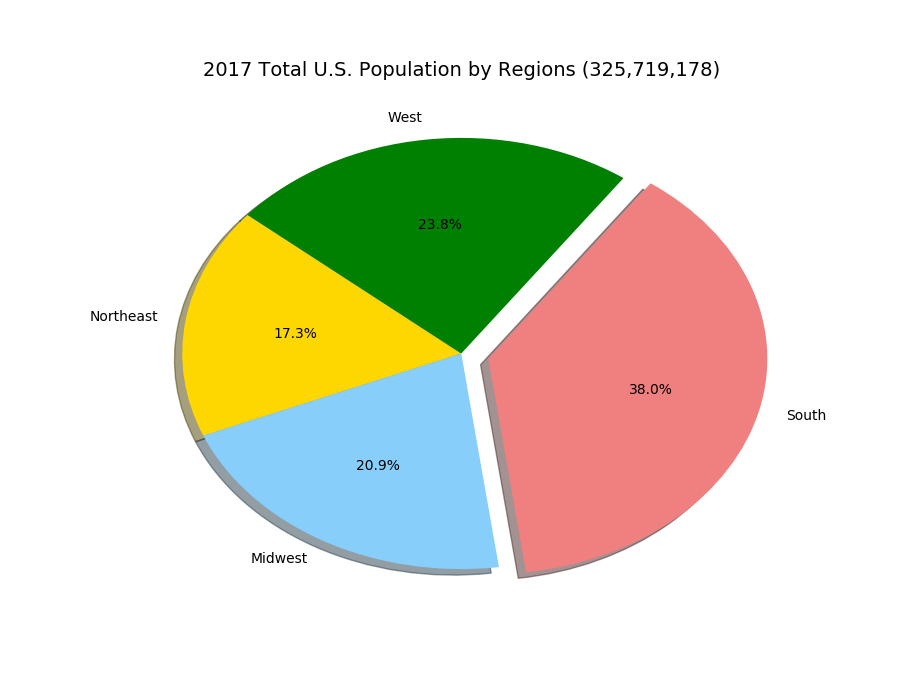

In [66]:
%matplotlib notebook

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd


# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral", "green"]
# Tells matplotlib to seperate the "Python" section from the others
explode = ( 0, 0, 0.1, 0)

# Oval Shape
plt.rcParams["figure.figsize"] = (9,7)

# Build Pie Chart
plt.pie(country_pop_df["Pop%_2017"], explode=explode, labels=country_pop_df["Region"], colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=140)

plt.title(f"2017 Total U.S. Population by Regions ({ttl_pop_2017})", fontdict={'fontsize': 14, 'fontweight': 'medium'})

# Save Figure
plt.savefig("Images/US_Region_Pop_2017.png")
plt.show()

## US Population by State: 2017 - Charleen
* #### Read data and map chart

In [67]:
%matplotlib inline
# Dependencies and Setup
from itertools import cycle, islice
# from cycler import cycler
import matplotlib.pyplot as plt


In [68]:
state_pop_per_17 = pd.read_csv("./Output/Demographic/statepopulationpercentage2017.csv", index_col=0)
state_pop_per_17.head()


,Total_Population 17
State,
Alabama,1.511123
Alaska,0.230079
Arizona,2.121449
Arkansas,0.927696
California,12.144022


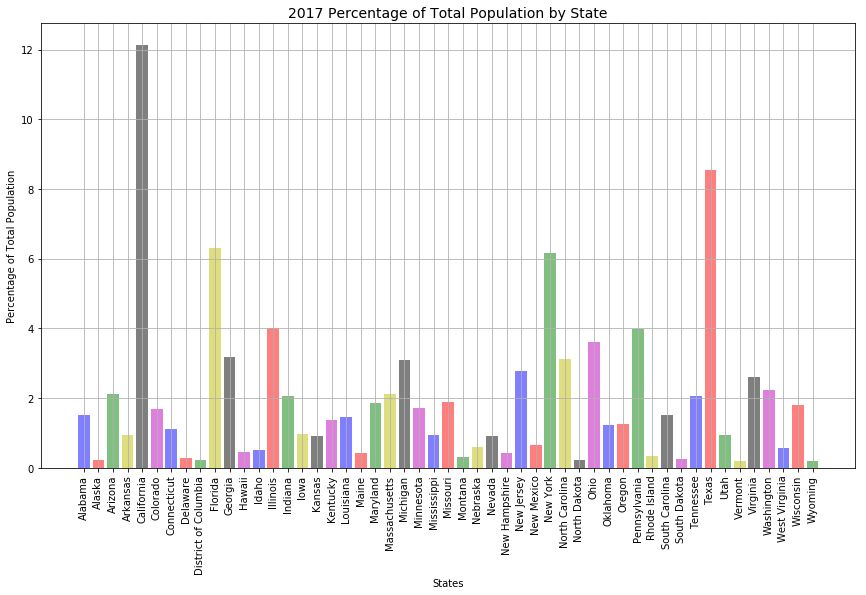

In [69]:
x_axis = np.arange(len(state_pop_per_17))
y_axis = state_pop_per_17["Total_Population 17"]

x_ticks = state_pop_per_17.index
plt.figure(figsize=(12, 8))
plt.xticks(x_axis, x_ticks, rotation=90)
plt.grid()
plt.tight_layout()

# x_axis.color_cycle
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k', 'm']), None, len(state_pop_per_17)))

plt.title("2017 Percentage of Total Population by State", fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.xlabel("States")
plt.ylabel("Percentage of Total Population")

plt.bar(x_axis, y_axis, color=my_colors, alpha=0.5)
plt.savefig("Images/Total%_Population_State.png")
plt.show()


## Top 5 States with most Females: 2017 by Charleen
* #### Read csv, filter data, and map plot

In [70]:
# total_gender_state_df = pd.read_csv("./Output/Demographic/Charleen/genderallyearsbystate.csv", index_col=0)
sort_gender_state_data = total_gender_state_df.sort_values(by='%_F_17', ascending=False)

sort_gender_state_data.head()

,State,Total_Population 12,%_M_12,%_F_12,Total_Population 13,%_M_13,%_F_13,Total_Population 14,%_M_14,%_F_14,Total_Population 15,%_M_15,%_F_15,Total_Population 16,%_M_16,%_F_16,Total_Population 17,%_M_17,%_F_17
8,District of Columbia,605759,47.3,52.7,619371,47.3,52.7,633736,47.3,52.7,647484,47.4,52.6,659009,47.4,52.6,672391,47.4,52.6
7,Delaware,900131,48.5,51.5,908446,48.4,51.6,917060,48.4,51.6,926454,48.4,51.6,934695,48.4,51.6,943732,48.4,51.6
0,Alabama,4777326,48.5,51.5,4799277,48.5,51.5,4817678,48.5,51.5,4830620,48.5,51.5,4841164,48.5,51.5,4850771,48.5,51.5
39,Rhode Island,1052471,48.3,51.7,1051695,48.3,51.7,1053252,48.4,51.6,1053661,48.4,51.6,1054491,48.5,51.5,1056138,48.5,51.5
20,Maryland,5785496,48.4,51.6,5834299,48.4,51.6,5887776,48.4,51.6,5930538,48.4,51.6,5959902,48.4,51.6,5996079,48.5,51.5


In [71]:
sort_female_state_data = pd.DataFrame(sort_gender_state_data.iloc[0:5,:])
sort_female_state_data.drop(sort_female_state_data.columns[[1,2,4,5,7,8,10,11,13,14]],inplace=True, axis=1)
 
sort_female_state_data

,State,%_F_12,%_F_13,%_F_14,%_F_15,%_F_16,Total_Population 17,%_M_17,%_F_17
8,District of Columbia,52.7,52.7,52.7,52.6,52.6,672391,47.4,52.6
7,Delaware,51.5,51.6,51.6,51.6,51.6,943732,48.4,51.6
0,Alabama,51.5,51.5,51.5,51.5,51.5,4850771,48.5,51.5
39,Rhode Island,51.7,51.7,51.6,51.6,51.5,1056138,48.5,51.5
20,Maryland,51.6,51.6,51.6,51.6,51.6,5996079,48.5,51.5


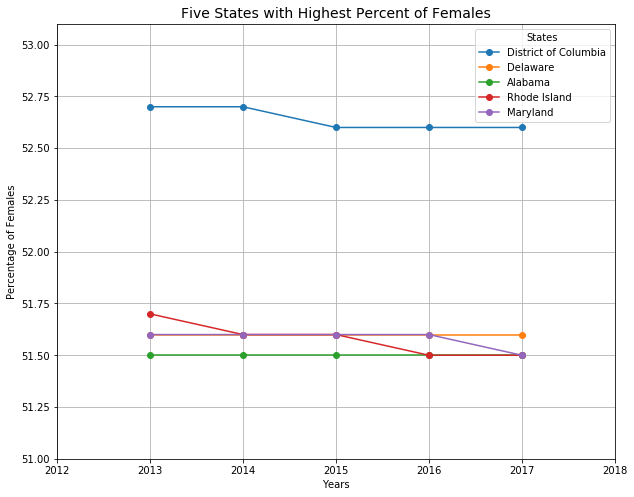

In [72]:
state_list = sort_female_state_data["State"].values.tolist()
years = [2013,2014,2015,2016,2017]
sort_female_state_data = sort_female_state_data.set_index("State")
for item in state_list:
    num_yr = sort_female_state_data.loc[item,["%_F_13","%_F_14","%_F_15","%_F_16","%_F_17"]]
    plt.plot(years, num_yr, marker="o", label=item)
        
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.grid()
plt.title("Five States with Highest Percent of Females", fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.xlabel("Years")
plt.ylabel("Percentage of Females")
plt.xlim(round(min(years) - .5), round(max(years) + .5))
plt.ylim(min(sort_female_state_data["%_F_13"]) - .5, max(sort_female_state_data["%_F_17"]) + .5)
# # Create a legend
plt.legend(title="States", loc='best')


# # Save the plot and display it
plt.savefig("Images/top5_states_%F.png")
plt.show()

## 2015 Crime by Tanique

In [78]:
crime_file_2015 = "./Team/Tanique/Resources/Table_69_Arrest_by_State_2015.xls"
excel_reader_pd_2015 = pd.read_excel(crime_file_2015)
excel_reader_pd_2015.head()

,State,Total Crime,Violent Crime,Property Crime,Murder,Rape,Robbery,Assault,Theft,Vehicle Theft,Arson,Fraud,Embezzlement,Vandalism,Weapons Carrying,Sex Offenses,Drug Violations,DUI,Disorderly Conduct
0,ALABAMA,140450,5537,19386,283,336,1088,3830,15558,727,93,4119,240,1489,1374,457,8967,7863,2187
1,ALASKA,31402,2193,3453,47,118,294,1734,2540,361,67,230,72,898,303,240,1212,3163,795
2,ARIZONA,226367,7161,30609,134,230,1047,5750,26717,1064,156,1505,139,7934,1929,1080,24892,22367,16750
3,ARKANSAS,127083,4667,15771,123,273,589,3682,13357,364,73,1145,54,1350,886,134,12700,6919,2185
4,CALIFORNIA,1158479,107454,127671,1431,2465,15841,87717,65037,17303,1185,6499,972,17143,25946,9395,206194,141458,4674


In [79]:
total_crime_2015 = excel_reader_pd_2015[["State", "Total Crime"]].sort_values('Total Crime', ascending=True)
total_crime_2015.head(5)

,State,Total Crime
8,DISTRICT OF COLUMBIA,7218
45,VERMONT,11183
26,MONTANA,25687
50,WYOMING,27058
39,RHODE ISLAND,27171


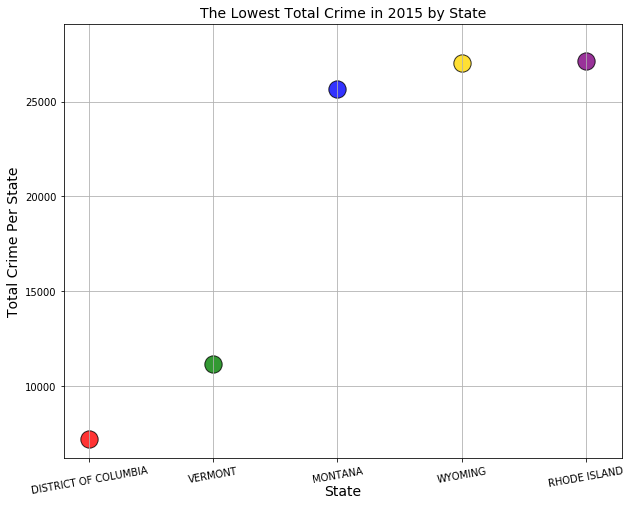

In [80]:
DC_2015 = total_crime_2015.loc[(total_crime_2015["State"] == "DISTRICT OF COLUMBIA")]
DC_X = DC_2015["State"]
DC_Y = DC_2015["Total Crime"]
plt.scatter(DC_X, DC_Y, s=300, marker="o", facecolors="red", edgecolors="black", alpha=0.8, label="DC")

VT_2015 = total_crime_2015.loc[(total_crime_2015["State"] == "VERMONT")]
VT_X = VT_2015["State"]
VT_Y = VT_2015["Total Crime"]
plt.scatter(VT_X, VT_Y, s=300, marker="o", facecolors="green", edgecolors="black", alpha=0.8, label="VT")

MO_2015 = total_crime_2015.loc[(total_crime_2015["State"] == "MONTANA")]
MO_X = MO_2015["State"]
MO_Y = MO_2015["Total Crime"]
plt.scatter(MO_X, MO_Y, s=300, marker="o", facecolors="blue", edgecolors="black", alpha=0.8, label="MO")

WY_2015 = total_crime_2015.loc[(total_crime_2015["State"] == "WYOMING")]
WY_X = WY_2015["State"]
WY_Y = WY_2015["Total Crime"]
plt.scatter(WY_X, WY_Y, s=300, marker="o", facecolors="gold", edgecolors="black", alpha=0.8, label="WY")

RI_2015 = total_crime_2015.loc[(total_crime_2015["State"] == "RHODE ISLAND")]
RI_X = RI_2015["State"]
RI_Y = RI_2015["Total Crime"]
plt.scatter(RI_X, RI_Y, s=300, marker="o", facecolors="purple", edgecolors="black", alpha=0.8, label="RI")
fig = plt.gcf()
fig.set_size_inches(10, 8)

# Incorporate the other graph properties
plt.grid()

plt.xticks(rotation=10)

# Create a title, x label, and y label for our chart
plt.title("The Lowest Total Crime in 2015 by State", fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.xlabel("State", fontdict={'fontsize': 14, 'fontweight': 'medium'}, labelpad=-11)
plt.ylabel("Total Crime Per State", fontdict={'fontsize': 14, 'fontweight': 'medium'}, labelpad=4)

# Save Figure
plt.savefig("Images/LowestTotalCrime2015.png")

### 2015 Crime Rate vs. Population Rate by State - Jane

In [81]:
# Merge population by state with crime on 2015
state_pop_df = all_df[["State", "Pop_2015"]]
# Convert population to integer
state_pop_df["Pop_2015"] = pd.to_numeric(state_pop_df["Pop_2015"].str.replace(",", ""), errors='coerce').fillna(0).astype(np.int64)
state_pop_df = state_pop_df.sort_values('State', ascending=True)
total_crime_2015["State"] = total_crime_2015.State.str.capitalize()
state_pop_df["State"] = state_pop_df.State.str.capitalize()
state_crime_df = (pd.merge(state_pop_df, total_crime_2015, how='inner', on='State')).rename(columns={"Pop_2015": "Total_Population", "Total Crime": "Total_Crime"})
state_crime_df.head()


,State,Total_Population,Total_Crime
0,Alabama,4850858,140450
1,Alaska,737979,31402
2,Arizona,6802262,226367
3,Arkansas,2975626,127083
4,California,39032444,1158479


In [83]:
# Calculate % of Crime in relation to Total US Population
total_US_Crime = state_crime_df["Total_Crime"].sum()
total_US_Pop = state_crime_df["Total_Population"].sum()
state_crime_df["%_Crime"] = [(row["Total_Crime"]/total_US_Crime) * 100 for i, row in state_crime_df.iterrows()]
state_crime_df["%_Pop"] = [(row["Total_Population"]/total_US_Pop) * 100 for i, row in state_crime_df.iterrows()]
# A crime rate is calculated by dividing the number of reported crimes by the total population; the result is multiplied by 100,000.
state_crime_df["Crime_Rate"] = [round((row["Total_Crime"]/row["Total_Population"]) * 100000) for i, row in state_crime_df.iterrows()]
state_crime_df["%Pop_Crime_Diff"] = [(row["%_Pop"] - row["%_Crime"]) for i, row in state_crime_df.iterrows()]
# State with lowest crime rate per capita (100,000)
state_crime_df = state_crime_df.sort_values(by='Crime_Rate', ascending=True)
state_crime_df.head()


,State,Total_Population,Total_Crime,%_Crime,%_Pop,Crime_Rate,%Pop_Crime_Diff
13,Illinois,12862051,91218,1.004728,4.006372,709,3.001644
8,District of columbia,672736,7218,0.079503,0.209549,1073,0.130046
32,New york,19819347,271540,2.990899,6.173485,1370,3.182586
21,Massachusetts,6794002,116347,1.281513,2.116249,1712,0.834735
45,Vermont,624455,11183,0.123176,0.194510,1791,0.071334


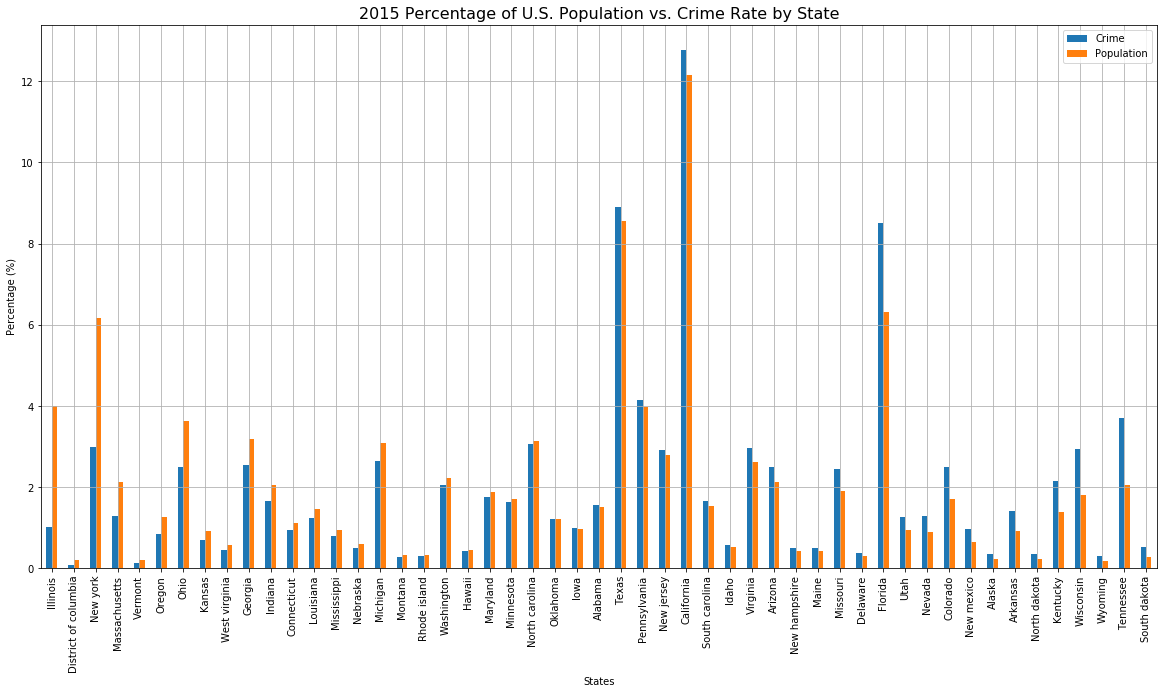

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot % of U.S. Populate vs %Crime 
pop_crime_df = state_crime_df[["State", "%_Crime", "%_Pop"]].rename(columns={"%_Crime": "Crime", "%_Pop": "Population"})
pop_crime_df = pop_crime_df.set_index("State")
pop_crime_df.plot(kind='bar', figsize=[20, 10], rot=90)

plt.grid()
plt.title("2015 Percentage of U.S. Population vs. Crime Rate by State", fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.xlabel("States")
plt.ylabel("Percentage (%)")

# # Save the plot and display it
plt.savefig("Images/PopvsCrime_2015.png")
plt.show()
